#### Pacotes importados para manipulação dos dados

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopy.distance
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

##### Importação dos dados

In [3]:
sample_submission = pd.read_csv('dados/taxi-sample-submission.csv')
submission = pd.read_csv('dados/taxi-submission.csv')
taxi_train = pd.read_csv('dados/taxi-train.csv')

#### Tratamento

In [4]:
taxi_train.head()

,unique_key,taxi_id,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,pickup_census_tract,dropoff_census_tract,pickup_community_area,dropoff_community_area,...,trip_total,payment_type,company,pickup_latitude,pickup_longitude,pickup_location,dropoff_latitude,dropoff_longitude,dropoff_location,ride_date
0,5c41b7afe9da0d7fbe60dc0e925975b832375a3c,efd204f38a83a59df5bf4a1fe004aa291183e235ee40ee...,2016-02-07 01:45:00+00:00,2016-02-07 01:45:00+00:00,360.0,0.0,1.703108e+10,1.703108e+10,8.0,8.0,...,8.50,Credit Card,Northwest Management LLC,41.892042,-87.631864,POINT (-87.6318639497 41.8920421365),41.900221,-87.629105,POINT (-87.6291051864 41.9002212967),2016-02-07
1,9333962b69bef1506be0b0a7edbd1d6626edd6ab,1a1189d1e9f4f676bbeaf49903912684b94453576a234f...,2013-05-08 19:15:00+00:00,2013-05-08 19:30:00+00:00,840.0,5.4,NaN,NaN,NaN,NaN,...,13.85,Cash,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013-05-08
2,6329807d0ad342bfe6671b2553592edadfd742b6,25e9bbb9704eb82311a4d4036baba6451cd27138c4d6eb...,2013-02-17 12:30:00+00:00,2013-02-17 12:30:00+00:00,NaN,0.0,NaN,NaN,NaN,NaN,...,52.38,Credit Card,Chicago Elite Cab Corp.,NaN,NaN,NaN,NaN,NaN,NaN,2013-02-17
3,049949c0f58cc75d58ef9faf8ba4030c6ef0cf34,8b8b185d8a60ac5edd94c0494d0b9b9c9c86d54c0ab3dd...,2014-11-09 10:45:00+00:00,2014-11-09 11:00:00+00:00,540.0,1.6,NaN,NaN,6.0,3.0,...,9.55,Credit Card,NaN,41.944227,-87.655998,POINT (-87.6559981815 41.9442266014),41.965812,-87.655879,POINT (-87.6558787862 41.96581197),2014-11-09
4,4554e53540678f18384d5fcd6d42623ccc60d6e2,73b2f5adecea91eeef3900303a07f1b0519a594cffb6b0...,2019-04-13 20:00:00+00:00,2019-04-13 20:00:00+00:00,577.0,1.5,1.703184e+10,1.703108e+10,32.0,8.0,...,11.25,Credit Card,Chicago Taxicab,41.880994,-87.632746,POINT (-87.6327464887 41.8809944707),41.892042,-87.631864,POINT (-87.6318639497 41.8920421365),2019-04-13


In [149]:
submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   unique_key              20000 non-null  object 
 1   taxi_id                 20000 non-null  object 
 2   trip_start_timestamp    20000 non-null  object 
 3   trip_end_timestamp      19995 non-null  object 
 4   trip_seconds            19870 non-null  float64
 5   trip_miles              20000 non-null  float64
 6   pickup_census_tract     13124 non-null  float64
 7   dropoff_census_tract    13012 non-null  float64
 8   pickup_community_area   17672 non-null  float64
 9   dropoff_community_area  17282 non-null  float64
 10  tips                    19999 non-null  float64
 11  tolls                   16639 non-null  float64
 12  extras                  19999 non-null  float64
 13  trip_total              19999 non-null  float64
 14  payment_type            20000 non-null

In [6]:
taxi_train.describe()

,trip_seconds,trip_miles,pickup_census_tract,dropoff_census_tract,pickup_community_area,dropoff_community_area,fare,tips,tolls,extras,trip_total,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude
count,29805.000000,30000.000000,1.966300e+04,1.955900e+04,26445.000000,25919.000000,29999.000000,29999.000000,24933.000000,29999.000000,29999.000000,26449.000000,26449.000000,26007.000000,26007.000000
mean,798.112833,3.237427,1.703138e+10,1.703136e+10,23.859217,21.947375,12.872966,1.402873,0.001043,0.867869,15.191000,41.901371,-87.659851,41.901145,-87.655315
std,1507.877805,6.297811,3.431865e+05,3.375077e+05,20.037496,18.160866,12.289114,2.640751,0.055194,2.742169,15.147028,0.039336,0.073250,0.039685,0.061020
min,0.000000,0.000000,1.703101e+10,1.703101e+10,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,41.673820,-87.913625,41.660136,-87.913625
25%,310.000000,0.200000,1.703108e+10,1.703108e+10,8.000000,8.000000,6.000000,0.000000,0.000000,0.000000,7.000000,41.880994,-87.655998,41.880994,-87.655998
50%,540.000000,1.190000,1.703128e+10,1.703128e+10,24.000000,22.000000,8.050000,0.000000,0.000000,0.000000,9.650000,41.892073,-87.632746,41.892508,-87.633308
75%,960.000000,3.000000,1.703184e+10,1.703183e+10,32.000000,32.000000,13.500000,2.000000,0.000000,1.000000,15.450000,41.914616,-87.626211,41.921701,-87.626211
max,86386.000000,247.000000,1.703198e+10,1.703198e+10,77.000000,77.000000,269.850000,63.000000,4.000000,99.500000,274.350000,42.009623,-87.534903,42.015934,-87.540936


In [148]:
submission.isnull().sum()[taxi_train.isnull().sum() > 0] #a primeira parte pega todas as colunas e soma cada campo e
                                                    # a segunda parte mostra só as colunas q contém 1 ou mais valores

taxi_id                      0
trip_end_timestamp           5
trip_seconds               130
pickup_census_tract       6876
dropoff_census_tract      6988
pickup_community_area     2328
dropoff_community_area    2718
tips                         1
tolls                     3361
extras                       1
trip_total                   1
company                   3548
pickup_latitude           2327
pickup_longitude          2327
pickup_location           2327
dropoff_latitude          2669
dropoff_longitude         2669
dropoff_location          2669
dtype: int64

In [8]:
print(f'dataset total: {taxi_train.shape}')
print(f'dataset sem NA: {taxi_train.dropna().shape}')

dataset total: (30000, 24)
dataset sem NA: (12986, 24)


In [165]:
submission_sem_nulos = submission.copy()

In [161]:
taxi_sem_nulos = taxi_train.copy()

In [166]:
for coluna in submission.columns:
    submission_sem_nulos[coluna] = submission_sem_nulos[coluna].fillna(submission_sem_nulos[coluna].mode()[0])

In [162]:
for coluna in taxi_train.columns:
    taxi_sem_nulos[coluna] = taxi_sem_nulos[coluna].fillna(taxi_sem_nulos[coluna].mode()[0])

In [154]:
print(f"tamanho do dataset sem nulos: {taxi_sem_nulos.shape} \n")
taxi_sem_nulos.isnull().sum()[taxi_sem_nulos.isnull().sum() > 0] 

tamanho do dataset sem nulos: (20000, 23) 



Series([], dtype: int64)

In [155]:
taxi_sem_nulos.describe()

,trip_seconds,trip_miles,pickup_census_tract,dropoff_census_tract,pickup_community_area,dropoff_community_area,tips,tolls,extras,trip_total,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude
count,20000.000000,20000.000000,2.000000e+04,2.000000e+04,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,788.856350,3.288551,1.703153e+10,1.703153e+10,21.790100,19.934150,1.390842,0.004775,1.068128,15.403139,41.898843,-87.656273,41.898882,-87.652078
std,1432.062601,13.547173,3.553964e+05,3.535269e+05,19.375286,17.425585,2.743583,0.423437,29.203151,33.457225,0.037418,0.068605,0.037777,0.056595
min,0.000000,0.000000,1.703101e+10,1.703101e+10,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,41.663671,-87.913625,41.673820,-87.913625
25%,300.000000,0.200000,1.703108e+10,1.703108e+10,8.000000,8.000000,0.000000,0.000000,0.000000,7.000000,41.880994,-87.651062,41.880994,-87.655879
50%,540.000000,1.200000,1.703184e+10,1.703184e+10,8.000000,8.000000,0.000000,0.000000,0.000000,9.650000,41.891972,-87.632746,41.891972,-87.632746
75%,944.000000,3.000000,1.703184e+10,1.703184e+10,32.000000,32.000000,2.000000,0.000000,1.000000,15.450000,41.902788,-87.626215,41.907520,-87.626215
max,80691.000000,1720.000000,1.703198e+10,1.703198e+10,77.000000,77.000000,132.750000,50.000000,4111.140000,4114.390000,42.015697,-87.540936,42.015934,-87.551428


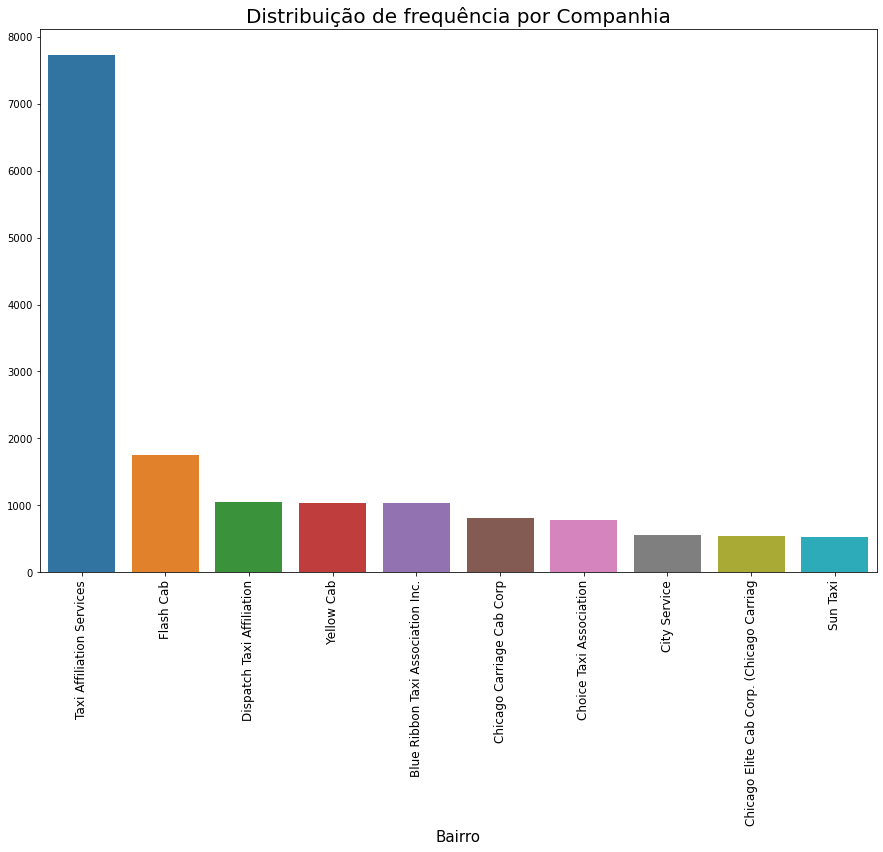

In [156]:
frequencia_companhias = taxi_sem_nulos['company'].value_counts().head(10)

plt.figure(figsize=(15,10)) # tamanho do gráfico
sns.barplot(x=frequencia_companhias.index, y=frequencia_companhias.values) # dados a serem apresentados

# ajustes no eixo x
plt.xticks(rotation=90, size=12) # rotação dos rotulos para melhor a legibilidade
plt.xlabel("Bairro", fontdict={"size": 15})

plt.title("Distribuição de frequência por Companhia", fontdict={'size': 20})

plt.show()

In [157]:
correlacao = taxi_sem_nulos.corr()

In [158]:
correlacao.style.background_gradient(cmap='coolwarm')

,trip_seconds,trip_miles,pickup_census_tract,dropoff_census_tract,pickup_community_area,dropoff_community_area,tips,tolls,extras,trip_total,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude
trip_seconds,1.000000,0.151694,0.112417,0.074272,0.203616,0.123019,0.202466,0.059798,0.008612,0.204214,0.088710,-0.236864,0.069323,-0.182718
trip_miles,0.151694,1.000000,0.093820,0.066418,0.162436,0.095901,0.169205,-0.000750,0.010272,0.131296,0.083561,-0.203486,0.031857,-0.124409
pickup_census_tract,0.112417,0.093820,1.000000,0.444831,0.401187,-0.036458,0.162972,-0.012570,0.017296,0.128115,0.076114,-0.389568,0.058607,-0.106137
dropoff_census_tract,0.074272,0.066418,0.444831,1.000000,-0.013195,0.342718,0.092590,-0.012353,0.010954,0.094166,0.059269,-0.090766,0.012298,-0.357815
pickup_community_area,0.203616,0.162436,0.401187,-0.013195,1.000000,0.153361,0.268567,0.016118,0.047398,0.195685,0.126595,-0.715622,-0.042359,-0.078331
dropoff_community_area,0.123019,0.095901,-0.036458,0.342718,0.153361,1.000000,0.114960,0.014555,0.023580,0.110798,-0.080203,-0.014685,-0.062369,-0.562592
tips,0.202466,0.169205,0.162972,0.092590,0.268567,0.114960,1.000000,-0.004816,0.024794,0.283964,0.075396,-0.321524,0.030563,-0.164273
tolls,0.059798,-0.000750,-0.012570,-0.012353,0.016118,0.014555,-0.004816,1.000000,0.000619,0.010893,0.023922,-0.003641,0.021575,0.000089
extras,0.008612,0.010272,0.017296,0.010954,0.047398,0.023580,0.024794,0.000619,1.000000,0.884370,0.028982,-0.062336,0.015099,-0.037974
trip_total,0.204214,0.131296,0.128115,0.094166,0.195685,0.110798,0.283964,0.010893,0.884370,1.000000,0.086661,-0.246659,0.045332,-0.168251


#### Modelo de Regressão

In [167]:
x = taxi_sem_nulos[['trip_total','dropoff_community_area','pickup_community_area','pickup_census_tract','trip_miles','trip_seconds']]
y = taxi_sem_nulos['fare']

train_test_split(x, y, test_size=0.6, random_state=0)

reg = LinearRegression() # instanciando o modelo
reg.fit(x, y) # treinando o modelo


LinearRegression()

In [114]:
print(reg.intercept_, reg.coef_, reg.score(x, y))

-14918.561324064041 [ 7.59993579e-01  2.26030483e-02 -2.39882439e-02  8.75994526e-07
  7.35451146e-02  2.43871299e-04] 0.9457321444242663


In [185]:
resultados = submission_sem_nulos[['trip_total','dropoff_community_area','pickup_community_area','pickup_census_tract','trip_miles','trip_seconds']].dropna()

In [186]:
resultados['fare_predict'] = reg.predict(resultados)

In [187]:
resultados

,trip_total,dropoff_community_area,pickup_community_area,pickup_census_tract,trip_miles,trip_seconds,fare_predict
0,55.20,8.0,76.0,1.703198e+10,0.9,3180.0,42.510994
1,11.44,7.0,8.0,1.703108e+10,2.9,540.0,9.578461
2,8.65,8.0,8.0,1.703108e+10,18.0,540.0,8.590162
3,16.00,8.0,33.0,1.703184e+10,4.2,1020.0,13.344913
4,9.45,33.0,32.0,1.703184e+10,2.5,720.0,8.756168
...,...,...,...,...,...,...,...
19995,7.05,6.0,6.0,1.703106e+10,1.5,240.0,6.073205
19996,97.20,32.0,8.0,1.703184e+10,26.7,6036.0,79.074930
19997,4.65,8.0,32.0,1.703184e+10,0.6,240.0,4.286328
19998,30.75,15.0,32.0,1.703184e+10,0.0,1500.0,24.543533


In [188]:
submission_matheus = pd.DataFrame(columns=['unique_key', 'fare'])

In [189]:
submission_matheus['unique_key'] = submission['unique_key']
submission_matheus['fare'] = resultados['fare_predict']

In [190]:
sample_submission

,unique_key,fare
0,ab1adf76a077d31a82824264aed032f197423f5d,12.0
1,d19b9b5131a749b6c8fee6661a84833421c1e25f,13.0
2,f5a6afb4daedb37b82500baf34cf41adcf7ca167,13.0
3,f06a3db639297271c4a1f5b3704d5c0790d62620,13.0
4,3d9dd92332405f2649b746dda48c2f926477e358,8.0
...,...,...
19995,bd399345026e933c8c9720433f3f7ef70ab2f6d3,16.0
19996,32f21576e43a257fa1c4c624576a097a8ff5f640,5.0
19997,2a66652862821235e5a24e9a6dc28e1663c41fcd,8.0
19998,dbac35b3e6a4ac99f8c691aaf885abc2f43cb4ca,18.0


In [191]:
submission_matheus

,unique_key,fare
0,ab1adf76a077d31a82824264aed032f197423f5d,42.510994
1,d19b9b5131a749b6c8fee6661a84833421c1e25f,9.578461
2,f5a6afb4daedb37b82500baf34cf41adcf7ca167,8.590162
3,f06a3db639297271c4a1f5b3704d5c0790d62620,13.344913
4,3d9dd92332405f2649b746dda48c2f926477e358,8.756168
...,...,...
19995,bd399345026e933c8c9720433f3f7ef70ab2f6d3,6.073205
19996,32f21576e43a257fa1c4c624576a097a8ff5f640,79.074930
19997,2a66652862821235e5a24e9a6dc28e1663c41fcd,4.286328
19998,dbac35b3e6a4ac99f8c691aaf885abc2f43cb4ca,24.543533


In [192]:
submission_matheus.dropna().to_csv('submission_matheus.csv', index=False)